In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
data = pd.read_csv("Chemical_Dataf.csv")

In [ ]:
data['Date Purchased'] = pd.to_datetime(data['Date Purchased'], format='%d-%m-%Y')

In [ ]:
data.set_index('Date Purchased', inplace=True)

In [ ]:
monthly_data = data.resample('M').sum()

Overall seasonality

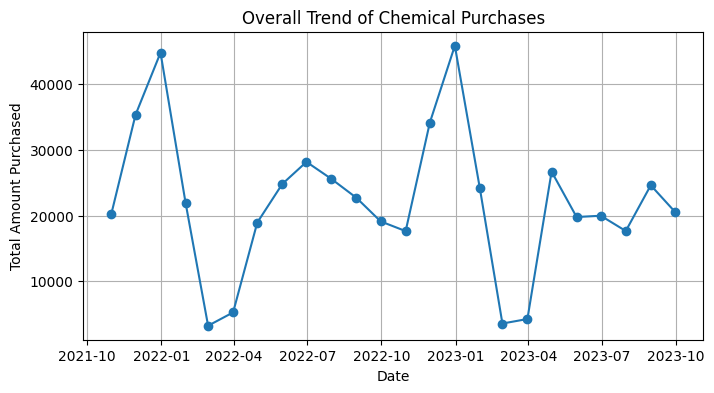

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(monthly_data.index, monthly_data['Amount Purchased'], marker='o', linestyle='-')
plt.title('Overall Trend of Chemical Purchases')
plt.xlabel('Date')
plt.ylabel('Total Amount Purchased')
plt.grid(True)
plt.show()

seasonality of a particular chemical

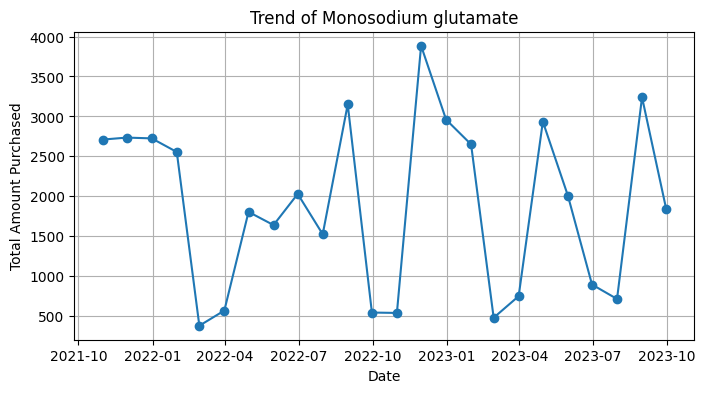

In [ ]:
plt.figure(figsize=(8, 4))
chem = "Monosodium glutamate"
sample_chemical_data = data[data['Chemical Name'] == chem]
monthly_sample_chemical_data = sample_chemical_data.resample('M').sum()
plt.plot(monthly_sample_chemical_data.index, monthly_sample_chemical_data['Amount Purchased'], marker='o')
plt.title('Trend of {}'.format(chem))
plt.xlabel('Date')
plt.ylabel('Total Amount Purchased')
plt.grid(True)
plt.show()

Seasonality of a company buying a specific chemical

Enter the name of the chemical: Sera Zon C
Enter the name of the company: company34


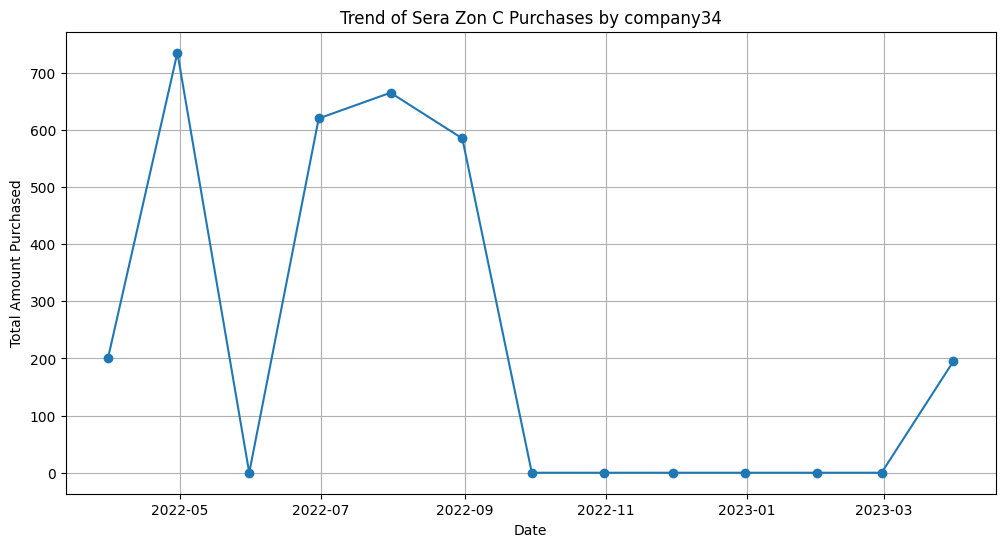

In [ ]:
chemical = input("Enter the name of the chemical: ")
company = input("Enter the name of the company: ")

# Filter data for the specified chemical and company within the specified timeframe
filtered_data = data[(data['Chemical Name'] == chemical) & (data['Company'] == company)]

# Resample daily data to monthly for better visualization
monthly_filtered_data = filtered_data.resample('M').sum()

# Plot the trend graph
plt.figure(figsize=(12,6))
plt.plot(monthly_filtered_data.index, monthly_filtered_data['Amount Purchased'], marker='o')
plt.title('Trend of {} Purchases by {}'.format(chemical, company))
plt.xlabel('Date')
plt.ylabel('Total Amount Purchased')
plt.grid(True)
plt.show()

Overall trend w.r.t chemicals

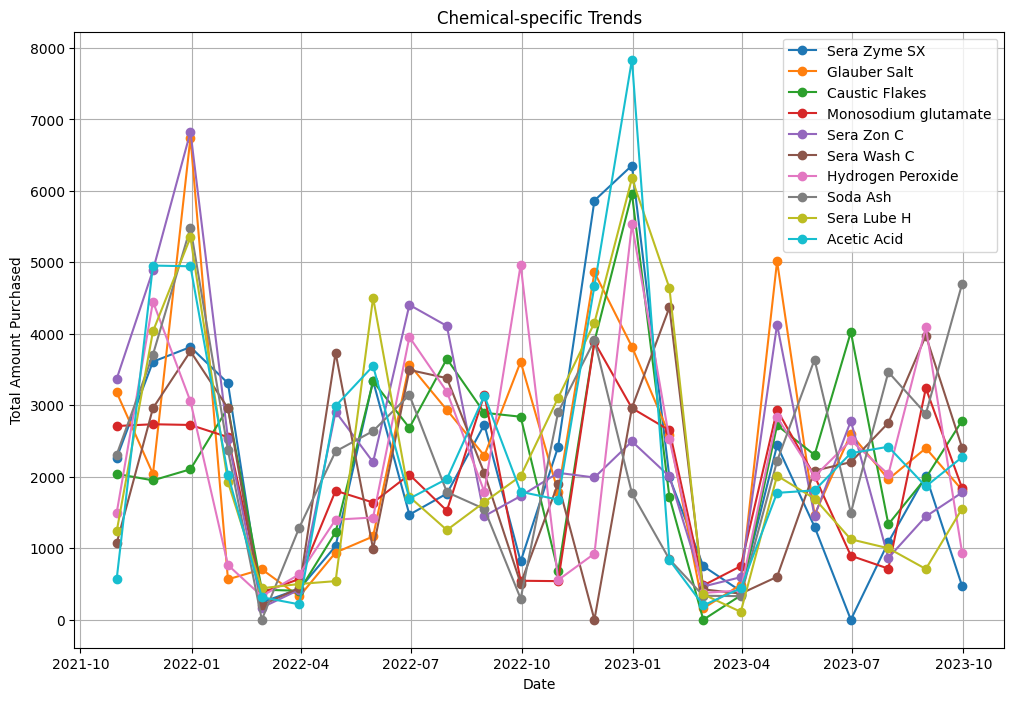

In [ ]:
plt.figure(figsize=(12, 8))
for chemical in data['Chemical Name'].unique():
    chemical_data = data[data['Chemical Name'] == chemical]
    monthly_chemical_data = chemical_data.resample('M').sum()
    plt.plot(monthly_chemical_data.index, monthly_chemical_data['Amount Purchased'], label=chemical, marker='o')

plt.title('Chemical-specific Trends')
plt.xlabel('Date')
plt.ylabel('Total Amount Purchased')
plt.legend()
plt.grid(True)
plt.show()

Overall trends w.r.t companies

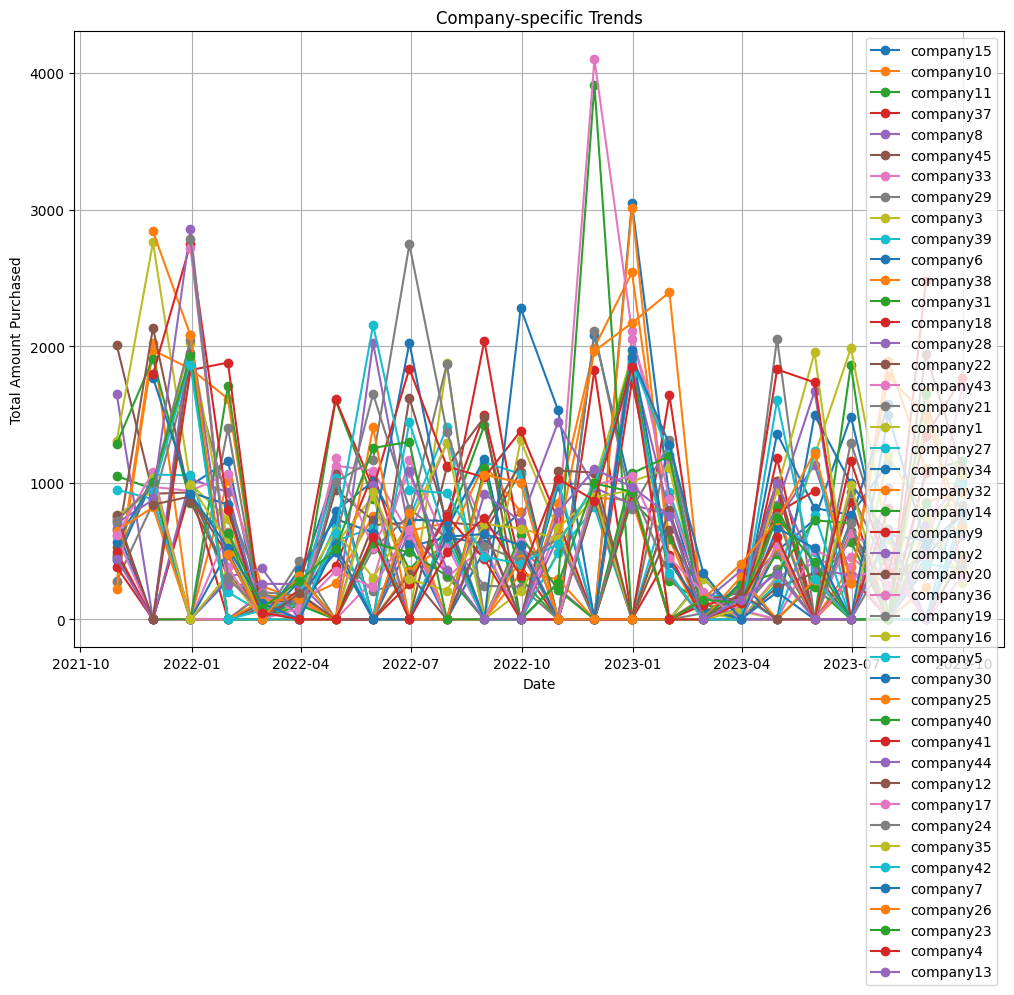

In [ ]:
plt.figure(figsize=(12, 8))
for company in data['Company'].unique():
    company_data = data[data['Company'] == company]
    monthly_company_data = company_data.resample('M').sum()
    plt.plot(monthly_company_data.index, monthly_company_data['Amount Purchased'], label=company, marker='o')

plt.title('Company-specific Trends')
plt.xlabel('Date')
plt.ylabel('Total Amount Purchased')
plt.legend()
plt.grid(True)
plt.show()